In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
SRM22 = pd.read_csv('SRM22_encoded.csv')
SRM23= pd.read_csv('SRM23_encoded.csv')
SRM23 = SRM23.head(50)
dataFrames = [SRM22,SRM23]
df = pd.concat(dataFrames, axis = 0)
df.tail()

,Created Date,Attendance Count
45,2023-05-07,1
46,2023-05-09,7
47,2023-05-12,11
48,2023-05-15,14
49,2023-05-16,10


In [3]:
df = df.rename(columns={'Created Date': 'ds', 'Attendance Count': 'y'})
df

,ds,y
0,2022-03-16,70
1,2022-03-17,30
2,2022-03-18,37
3,2022-03-19,3
4,2022-03-20,1
...,...,...
45,2023-05-07,1
46,2023-05-09,7
47,2023-05-12,11
48,2023-05-15,14


In [4]:
df = df.reset_index(drop=True)
df

,ds,y
0,2022-03-16,70
1,2022-03-17,30
2,2022-03-18,37
3,2022-03-19,3
4,2022-03-20,1
...,...,...
134,2023-05-07,1
135,2023-05-09,7
136,2023-05-12,11
137,2023-05-15,14


In [5]:
df = pd.DataFrame(df)
df['ds'] = pd.to_datetime(df['ds'])

#complete date range
full_date_range = pd.date_range(start=df['ds'].min(), end=df['ds'].max(), freq='D')

# missing dates
missing_dates = full_date_range.difference(df['ds'])

# filtering Missing dates
missing_dates_df = pd.DataFrame(missing_dates, columns=['ds'])

# Display missing dates
print("Missing Dates:")
print(missing_dates_df)

Missing Dates:
            ds
0   2022-04-02
1   2022-04-03
2   2022-04-07
3   2022-04-09
4   2022-04-10
..         ...
283 2023-05-08
284 2023-05-10
285 2023-05-11
286 2023-05-13
287 2023-05-14

[288 rows x 1 columns]


In [10]:
# Check for duplicate rows
print(df.duplicated().sum())
# Check for duplicate rows using 'ds' column
print(df['ds'].duplicated().sum())

0
0


In [6]:
# filling missing dates with NaNs
df = df.set_index('ds').reindex(full_date_range).rename_axis('ds').reset_index()
print("DataFrame with Missing Dates Filled as NaNs:")
print(df)

DataFrame with Missing Dates Filled as NaNs:
            ds     y
0   2022-03-16  70.0
1   2022-03-17  30.0
2   2022-03-18  37.0
3   2022-03-19   3.0
4   2022-03-20   1.0
..         ...   ...
422 2023-05-12  11.0
423 2023-05-13   NaN
424 2023-05-14   NaN
425 2023-05-15  14.0
426 2023-05-16  10.0

[427 rows x 2 columns]


In [7]:
m = Prophet()
m.fit(df)

18:44:29 - cmdstanpy - INFO - Chain [1] start processing
18:44:29 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
#Function to calculate the number of days in the future to predict (period)
def period(stop_date):
    last_date = df['ds'].max()
    period = (stop_date - last_date).days # the day when the prediction is executed
    return period

#creating a dataframe that extends into the future based on our calculated days above
future = m.make_future_dataframe(periods=int(period(stop_date = datetime.strptime(input("Enter last date of event (YYYY-MM-DD): "), '%Y-%m-%d'))))
last_date = df['ds'].max()
future = future[future['ds'] > last_date]

# Predicting future ticket sales
forecast = m.predict(future)
Sum_yhat = round(forecast[forecast['yhat']>0])
#forecast['yhat'] = forecast['yhat'].abs()
result = forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
print(result.tail())

Enter last date of event (YYYY-MM-DD):  2023-07-18


           ds      yhat  yhat_upper  yhat_lower
58 2023-07-14  7.421219   29.588870  -14.356854
59 2023-07-15 -3.593560   20.343527  -27.256777
60 2023-07-16 -4.366097   19.439232  -27.620703
61 2023-07-17  3.746849   29.353390  -18.643056
62 2023-07-18  2.519220   25.282877  -20.059295


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


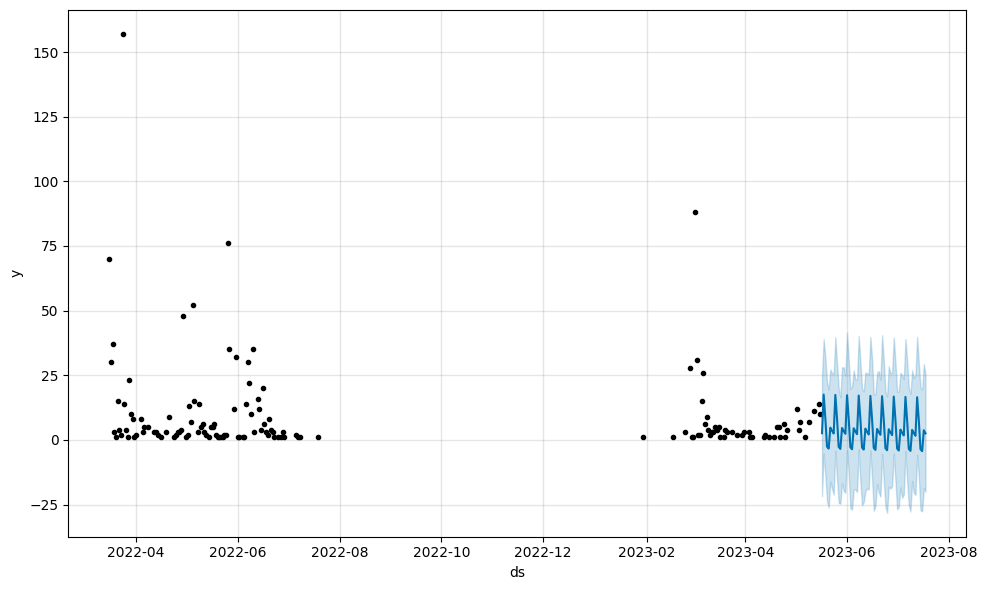

In [23]:
fig1 = m.plot(result)

In [24]:
forecast = forecast[['ds', 'yhat']]
forecast

,ds,yhat
0,2023-05-17,2.596260
1,2023-05-18,17.519409
2,2023-05-19,8.424554
3,2023-05-20,-2.590225
4,2023-05-21,-3.362762
...,...,...
58,2023-07-14,7.421219
59,2023-07-15,-3.593560
60,2023-07-16,-4.366097
61,2023-07-17,3.746849


In [25]:
test= pd.read_csv('SRM23_encoded.csv')
test_data = test.iloc[50:]
test_data = test_data.rename(columns={'Created Date': 'ds', 'Attendance Count': 'y'})
test_data

,ds,y
50,2023-05-17,19
51,2023-05-18,25
52,2023-05-19,11
53,2023-05-20,2
54,2023-05-21,3
55,2023-05-22,18
56,2023-05-23,65
57,2023-05-24,69
58,2023-05-25,18
59,2023-05-26,8


In [20]:
# For comparison purpose, we merge the test data and the forecasted data
forecast['ds'] = pd.to_datetime(forecast['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])
merged_data = test_data[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')
merged_data

,ds,y,yhat
0,2023-05-17,19,2.596260
1,2023-05-18,25,17.519409
2,2023-05-19,11,8.424554
3,2023-05-20,2,2.590225
4,2023-05-21,3,3.362762
5,2023-05-22,18,4.750185
6,2023-05-23,65,3.522556
7,2023-05-24,69,2.470843
8,2023-05-25,18,17.393992
9,2023-05-26,8,8.299137


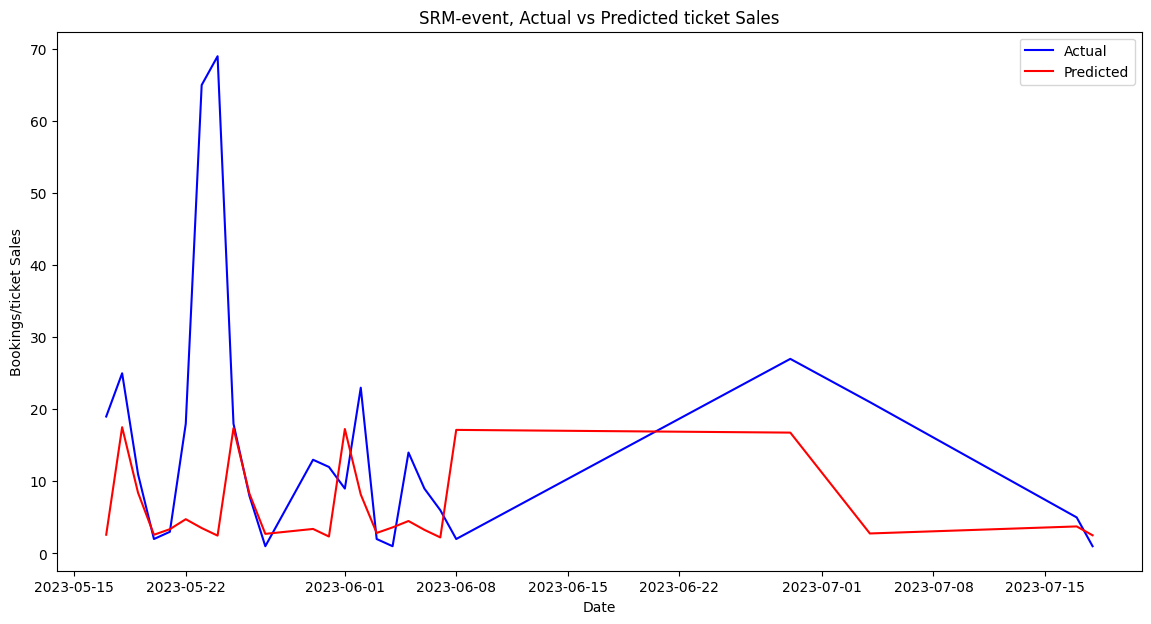

In [26]:
# Plotting the actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(merged_data['ds'], merged_data['y'], label='Actual', color='blue')
plt.plot(merged_data['ds'], merged_data['yhat'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Bookings/ticket Sales')
plt.title('SRM-event, Actual vs Predicted ticket Sales')
plt.legend()
plt.savefig('SameEvent.jpg', bbox_inches='tight')
plt.show()

In [28]:
#Calculation of the final number of the predicted Total of ticket sale and the actual ticket sold
dfs = [df,test_data]
combined_dfs = pd.concat(dfs, axis = 0)
forecast['ds'] = pd.to_datetime(forecast['ds'])
combined_dfs['ds'] = pd.to_datetime(combined_dfs['ds'])
Start_date = datetime.strptime(input("Enter First day for ticket sales, Format: (YYYY-MM-DD): "), '%Y-%m-%d')
FDate_Ranges = df[df['ds'] >= Start_date]
TDate_Ranges = combined_dfs[combined_dfs['ds'] >= Start_date]
sum_yhat = Sum_yhat['yhat'].sum() + FDate_Ranges['y'].sum()
sum_y_actual = TDate_Ranges['y'].sum()
print("Sum of predicted ticket sale to the D:Day:", round(sum_yhat))
print("Sum of actual Ticket Sales from the Test Data:", sum_y_actual)

Enter First day for ticket sales, Format: (YYYY-MM-DD):  2023-01-30


Sum of predicted ticket sale to the D:Day: 667
Sum of actual Ticket Sales from the Test Data: 741.0


In [75]:
# filter for forecasted data based on each day tickets were sold in the test_data
predicted = forecast[forecast['ds'].isin(test_data['ds'])]

# predicted and actual values
y_pred = predicted['yhat']
y_true = test_data['y']

# evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 11.299375943677889
Mean Squared Error (MSE): 400.2189626212565
Root Mean Squared Error (RMSE): 20.005473316601545


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [76]:
# Mean Absolute Percentage Error (MAPE)
mape = 100 * (abs(y_true - y_pred) / y_true).mean()
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 75.09%


C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


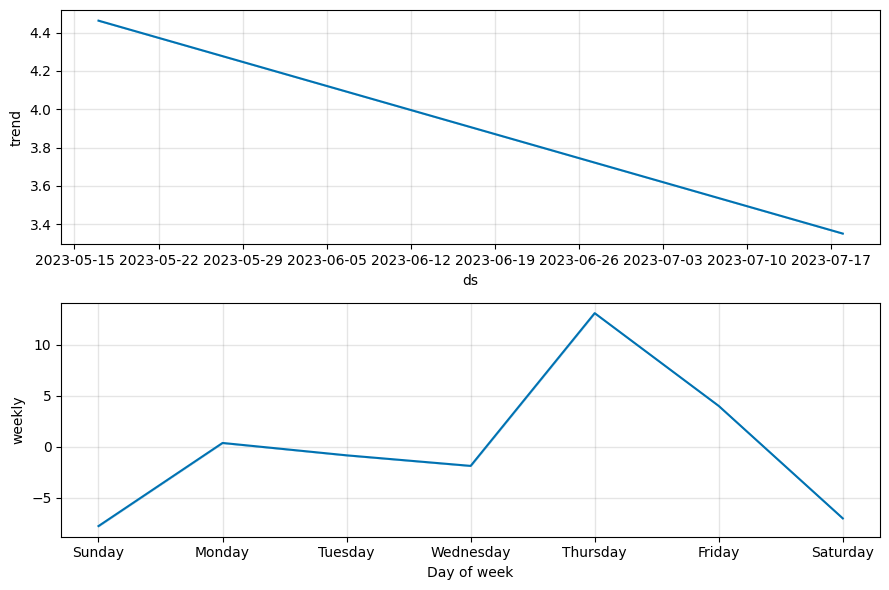

In [84]:
fig2 = m.plot_components(forecast)